<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Variables-categóricas" data-toc-modified-id="Variables-categóricas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Variables categóricas</a></span></li><li><span><a href="#¿Por-qué-debemos-codificar-las-variables-categóricas?" data-toc-modified-id="¿Por-qué-debemos-codificar-las-variables-categóricas?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>¿Por qué debemos codificar las variables categóricas?</a></span></li><li><span><a href="#Tipos-de--codificación" data-toc-modified-id="Tipos-de--codificación-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tipos de  codificación</a></span><ul class="toc-item"><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>One-Hot Encoding</a></span><ul class="toc-item"><li><span><a href="#get_dummies" data-toc-modified-id="get_dummies-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>get_dummies</a></span></li></ul></li><li><span><a href="#Label-Encoding" data-toc-modified-id="Label-Encoding-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Label Encoding</a></span><ul class="toc-item"><li><span><a href="#Usando-map" data-toc-modified-id="Usando-map-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Usando <code>map</code></a></span></li></ul></li><li><span><a href="#Ordinal-Encoding" data-toc-modified-id="Ordinal-Encoding-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Ordinal Encoding</a></span></li></ul></li></ul></div>

En este jupyter vamos a aprender que es el *feature encoding*, es decir, el proceso de convertir los datos categóricos de un conjunto de datos en datos numéricos. Es esencial que realicemos la codificación de estas variables porque la mayoría de los modelos de aprendizaje automático solo pueden interpretar datos numéricos y no datos en forma de texto.

# Variables categóricas

Las variables cualitativas son aquellas que hacen referencia a características o cualidades que no pueden ser medidas con números. Por ejemplo, el sexo de una persona es una variable cualitativa, ya que es masculino o femenino. 

Algunas de las caracteríticas de este tipo de variables son: 

- No se pueden medir numéricamente


- No otorga datos específicos y a a veces tampoco un orden


- Especifica una condición, cualidad o característica



Podemos encontrar tres tipos de variables cualitativas:

- `Ordinaria`: la variable cualitativa ordinaria, también conocida como variable cuasicuantitativa, es representada por una modalidad que no requiere números pero sí consta de un orden o un puesto.

    Por ejemplo, el nivel socioeconómico: alto, medio, bajo.


- `Nominal`: variable que no es representada por números ni tiene algún tipo de orden, y por lo tanto es matemáticamente menos precisa.

    Por ejemplo, son variables nominales los colores: negro, azul, rojo, amarillo, naranja, etc.


- `Binaria`: la variable cualitativa binaria trabaja con valores específicos del tipo binario.

    Por ejemplo, el sexo de una persona será masculino o femenino.

# ¿Por qué debemos codificar las variables categóricas?

Codificamos los datos categóricos a valores numéricos porque gran parte de los algoritmos de modelados (*machine learning* no pueden ejecutarse y procesar datos si éstos no son numéricos. Por lo tanto, los analistas de datos necesitan tener herramientas a su disposición para transformar colores como el rojo, el amarillo y el azul en números como el 1, el 2 y el 3 para que tengan lugar todas las matemáticas de nuestros modelos. 

In [3]:
# antes de empezar importemos las librerías que necesitaremos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None


In [5]:
df = pd.read_csv("data/insurance.csv")
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Tipos de  codificación

Ahora que sabemos cómo son los datos categóricos , hemos visto algunos ejemplos y lo importante que puede ser codificarlos, examinaremos los métodos comunes para convertir nuestros datos categóricos en datos numéricos. Estos métodos son: 

- **Varibles sin orden**
    - **One-Hot Encoding**: lo usaremos cuando nuestras variables no tengan orden

    - **get_dummies**: lo usaremos cuando nuestras variables no tengan orden

- **Variables con orden**:

    - **Label-Encoding**: lo usaremos cuando nuestras variables tengan orden

    - **map**: lo usaremos cuando nuestras variables tengan orden

    - **Ordinal-Encoding**: lo usaremos cuando nuestras variables tengan orden

Antes de decidir si las variables tienen orden o no, hagamos unas visualizaciones para entender si las variables tienen orden o no

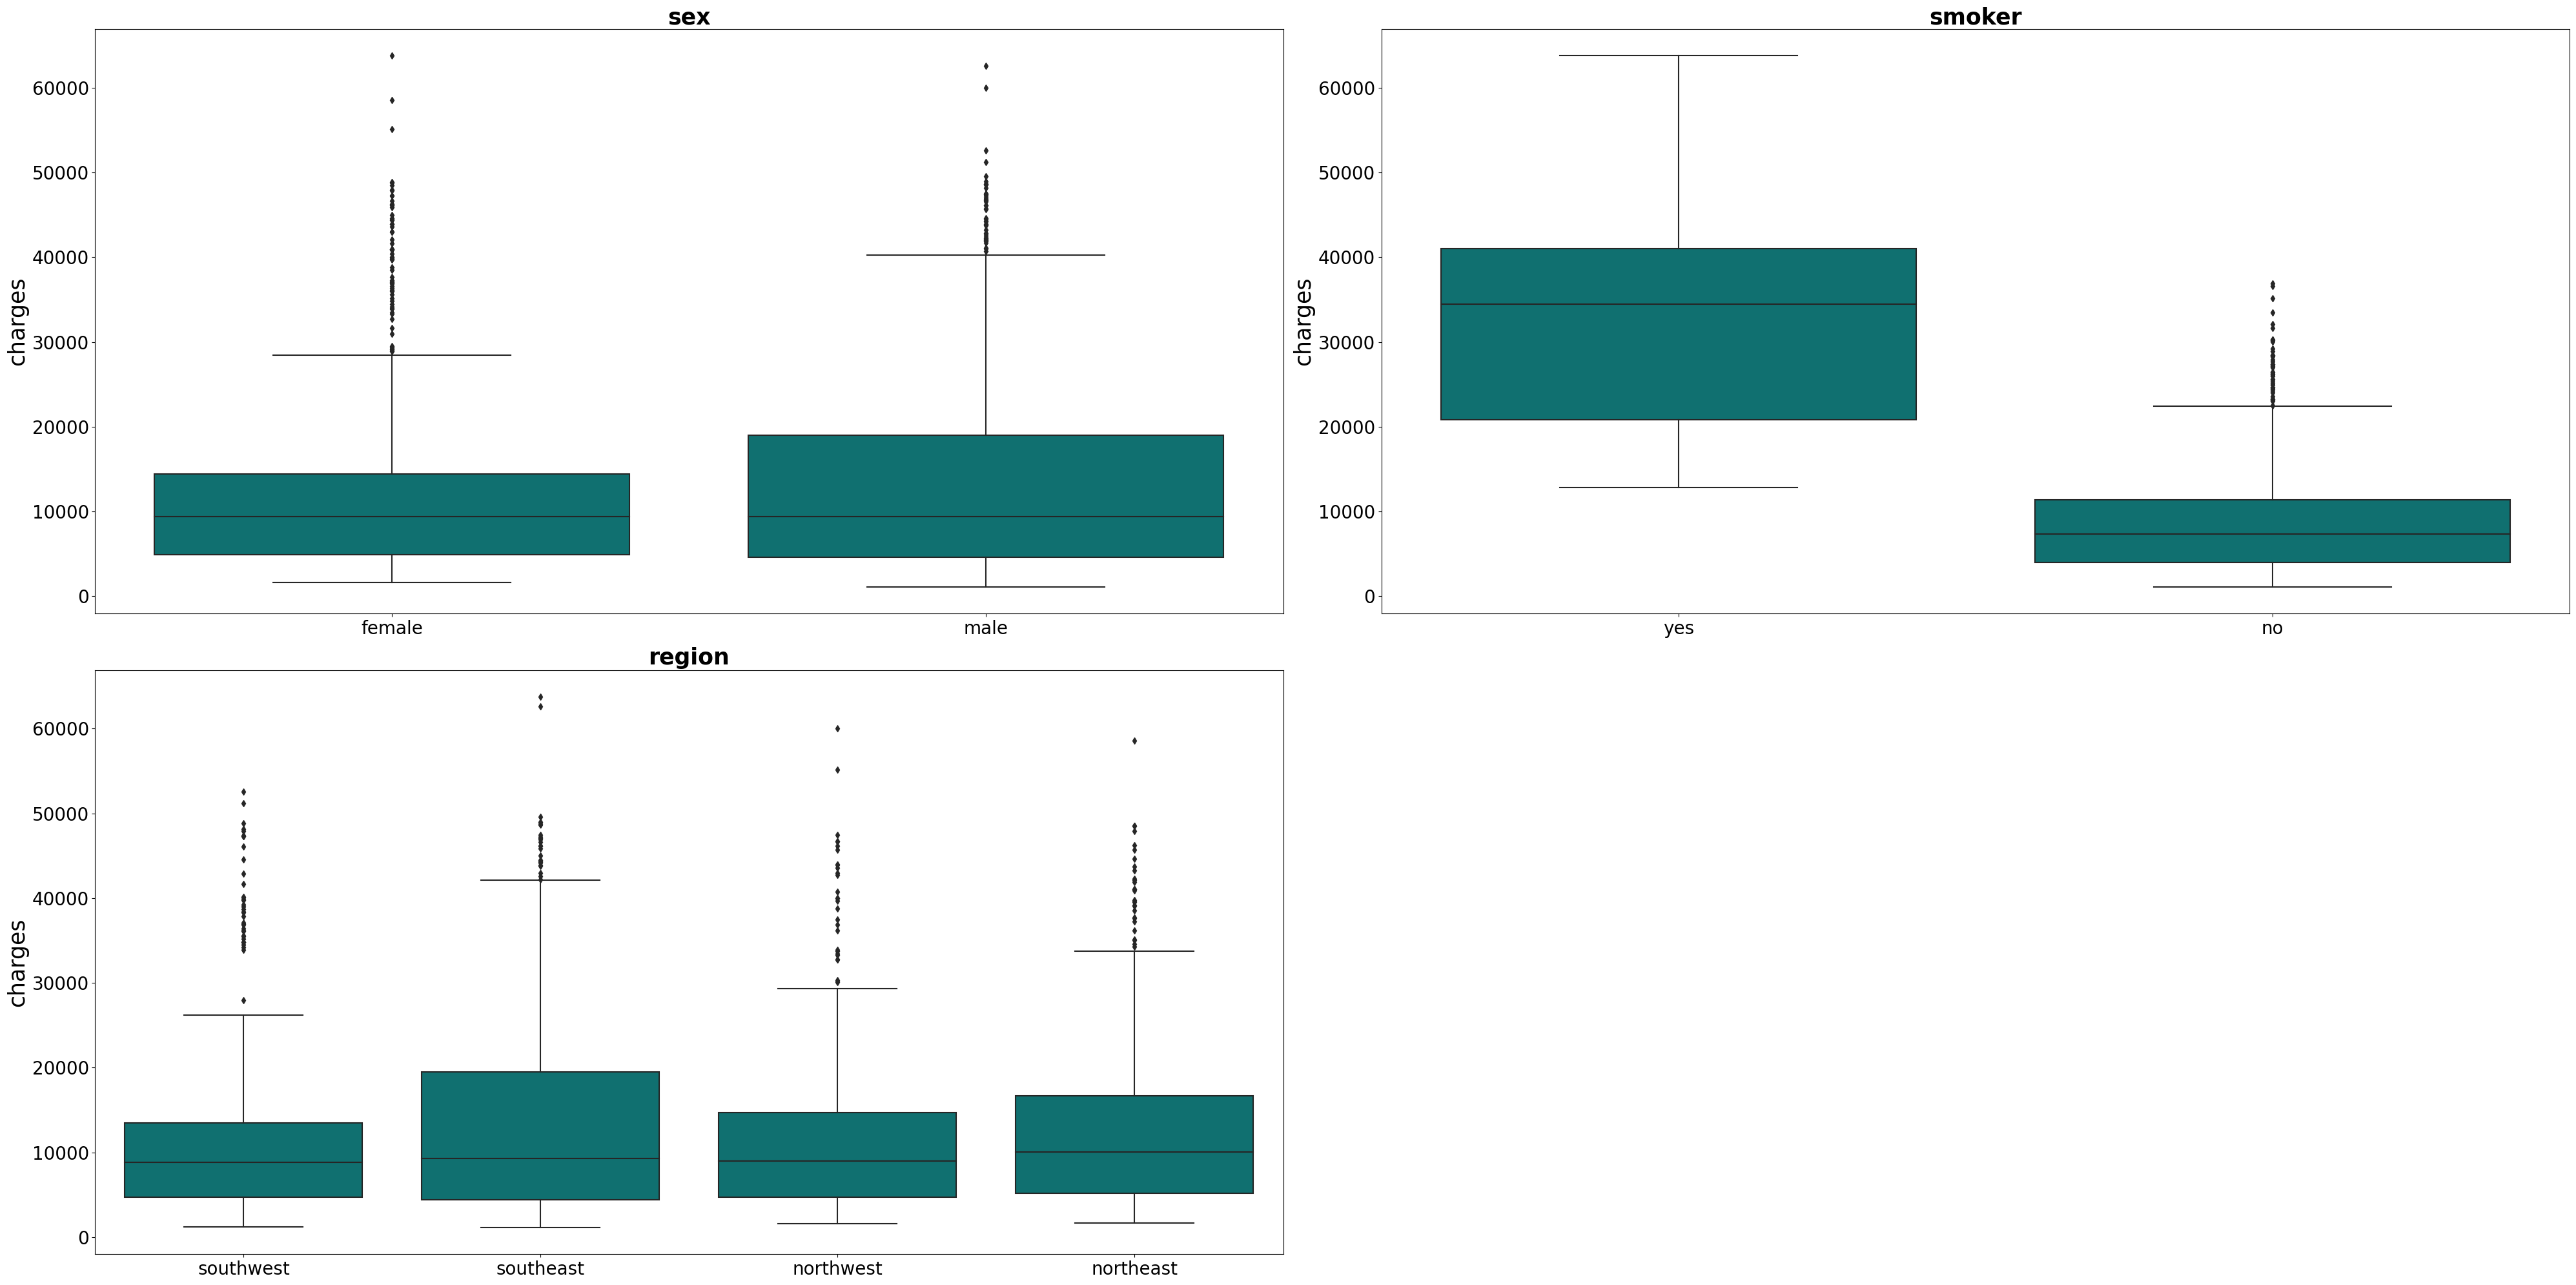

In [7]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (40, 20))


axes = axes.flat

columnas_cat = df.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat): 
    sns.boxplot(
        data = df,
        x = colum,
        y = "charges",
        color = "teal", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "charges", fontsize = 25)

fig.delaxes(axes[-1])

fig.tight_layout();

para ver si una variable tiene orden o no, la relacionaré con la respuesta

- sexos: la mediana es muy similar, no hay mucha diferencia entre las dos cateorías
- región: la mediana tb es muy similar.
- smokers: se aprecia un cambio como en la mediana -- hay un orden, y por tanto se puede penalizar a la hora de predecir el precio de la prima.

en resumen, si hay diferencia -- hay orden

## One-Hot Encoding

Si nuestra variable es el color primario (y cada fila tiene sólo un color primario), la codificación de un solo color representaría si el color presente en cada fila es rojo, azul o amarillo. 

Esto se consigue añadiendo una nueva columna para cada color posible. Con estas tres columnas que representan el color en cada fila de los datos, recorremos cada fila y asignamos el valor 1 a la columna que representa el color presente en nuestra fila actual y rellenamos las otras columnas de color de esa fila con un 0 para representar su ausencia. Veamos cómo podemos hacer esto en python y las ventajas e inconvenientes de este método.

[Aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) tenéis la documentación oficial sobre el método. 

Tendremos que importar 👇🏽

```python
from sklearn.preprocessing import OneHotEncoder  
```

Al final tendremos tantas columnas nuevas en nuestro *dataframe*  como categorías tengamos en nuestra columna. Por lo tanto, no es especialmente recomendable para variables con muchas categorías ya que nos generará *dataframes* con muchas columnas que lo hará muy pesado de cara a posibles computaciones en el futuro. 


📌 **NOTA** Este método nos va a devolver un array que tendremos que convertir a dataframe para incluir los cambios en nuestro *dataframe*

🚨 **Le podemos pasar varias columnas**

In [8]:
# nos hacemos una copia del dataframe

df1 = df.copy()
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
# iniciamos el método de OneHot Encoder

oh = OneHotEncoder()
oh

OneHotEncoder()

In [12]:
# hacemos la codificación de los datos para la variable dada 

transformados = oh.fit_transform(df1[["region"]])
type(transformados)

scipy.sparse._csr.csr_matrix

In [13]:
# convertimos nuestro array con la codificación hecha en un dataframe
## tienes que pasarlo a arry, porque sino no es un objeto legible
oh_df = pd.DataFrame(transformados.toarray(), dtype = int)
oh_df.head()

,0,1,2,3
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [16]:
# el método get_feature_names nos va a dar el nombre de las columnas nuevas que se nos generarán
oh_df.columns = oh.get_feature_names_out()
oh.get_feature_names_out() ## antes era distinto

array(['region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'], dtype=object)

In [17]:
oh_df.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [18]:
df1[oh_df.columns] = oh_df

In [19]:
df1.head()

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,0


In [13]:
# vamos a definir una función que nos aplique este método

def one_hot_encoder(dff, columnas):
    
    '''
    columnas: lista
    '''
    
    oh = OneHotEncoder()
    
    transformados = oh.fit_transform(dff[columnas])
    
    oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
    
    dff[oh_df.columns] = oh_df
    
    dff.drop(columnas, axis = 1, inplace = True)
    
    return dff
    


In [14]:
# volvemos a hacermos una copia para probar nuestra función con dos columnas

df2 = df.copy()
df2.head()

,sex,smoker,region,age,bmi,children,charges
0,female,yes,southwest,19.000000,27.900,0.0,16884.92400
1,male,no,southeast,18.000000,33.770,1.0,1725.55230
2,male,no,southeast,28.000000,33.000,3.0,4449.46200
3,male,no,northwest,33.000000,22.705,0.0,21984.47061
4,male,no,northwest,39.171927,28.880,0.0,3866.85520


In [15]:
df2 = one_hot_encoder(df2, ["sex", "smoker"])

In [16]:
# chequeamos para ver que ha pasado
df2.head()


,region,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,southwest,19.000000,27.900,0.0,16884.92400,1,0,0,1
1,southeast,18.000000,33.770,1.0,1725.55230,0,1,1,0
2,southeast,28.000000,33.000,3.0,4449.46200,0,1,1,0
3,northwest,33.000000,22.705,0.0,21984.47061,0,1,1,0
4,northwest,39.171927,28.880,0.0,3866.85520,0,1,1,0


Si nos fijamos en el output: 

- Las columnas `sex` y `region` se han eliminado


- En el caso de `region, se nos han creado 4 columnas nuevas, una para cada categoria que teníamos en nuestra columna. Se han creado columnas con valores de 0 y 1. ¿Qué significa esto? 
    
    - 1 -> el valor de esa fila en la columna original era el de la columna nueva
    
    - 0 -> el valor de esa fila en la columna original no era el de la columna nueva

###  get_dummies

También podemos hacer una codificación del tipo One-Hot Encoding usando el método de pandas `get_dummies`. 

Es una de las formas más fáciles de implementar un método de codificación en caliente y tiene parámetros muy útiles. 

[Aquí](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) la documentación oficial.

Su sintaxis: 

```python
pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, dtype=None)
```

- `data`: columna categórica objetivo de nuestro conjunto de datos


- `prefix_sep`: parámetro separador de prefijos para limpiar el nombre de la columna


- `prefix`: valores de prefijo para nuestras nuevas columnas


- `dtype`: tipo de número. Por defecto float. Tipo deseado de salida.

📌  **Lo tendremos que hacer columna a columna**

In [17]:
# nos creamos otra copia para ver como funciona el get_dummies

df4 = df.copy()
df4.head()

,sex,smoker,region,age,bmi,children,charges
0,female,yes,southwest,19.000000,27.900,0.0,16884.92400
1,male,no,southeast,18.000000,33.770,1.0,1725.55230
2,male,no,southeast,28.000000,33.000,3.0,4449.46200
3,male,no,northwest,33.000000,22.705,0.0,21984.47061
4,male,no,northwest,39.171927,28.880,0.0,3866.85520


In [18]:
# lo haremos para la columna "region"

dummies = pd.get_dummies(df4["region"], prefix_sep = "_", prefix = "region", dtype = int)
dummies.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [19]:
# incluimos las columnas creadas por el método get_dummies y eliminamos la de region original
df4[dummies.columns] = dummies
df4.drop(["region"], axis = 1, inplace = True)

In [20]:
df4.head()

,sex,smoker,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,female,yes,19.000000,27.900,0.0,16884.92400,0,0,0,1
1,male,no,18.000000,33.770,1.0,1725.55230,0,0,1,0
2,male,no,28.000000,33.000,3.0,4449.46200,0,0,1,0
3,male,no,33.000000,22.705,0.0,21984.47061,0,1,0,0
4,male,no,39.171927,28.880,0.0,3866.85520,0,1,0,0


Si nos fijamos se nos crean tantas columnas nuevas como categorias. Cada columna tendrá el prefijo que indicamos "platforms" separado por "_". 

**Ventajas e Incovenientes de usar esta aproximación** 


- Ventajas

    - Una de las ventajas obvias es que te das cuenta de si algún valor único en particular dentro de un conjunto de valores tiene un impacto excesivo o fuerte en una dirección positiva o negativa. 
    
    - Se mantiene la información sobre los valores de cada variable. Con la codificación por etiquetas, como veremos a continuación, obtenemos una buena medida del impacto de una característica particular en los modelos, pero no los impactos específicos de los valores únicos de esa característica.
    
- Inconvenientes

    - Aunque es bueno conocer el impacto, positivo o negativo, de cada ocurrencia única en los datos categóricos, a veces puede hacer que los resultados sean menos precisos. Sin embargo, lo más importante es que si algunos valores únicos son mucho más comunes que otros, podemos asumir erróneamente que estos valores son muy importantes cuando en realidad no lo son. 
    
    Por esta razón, se suele usar esta codificación para las variales que no tienen una cantidad abrumadora de valores únicos y/o la distribución de los valores únicos está relativamente equilibrada.
    
    - Dado que eliminamos nuestra variable una vez codificada, el efecto de la característica en sí puede perderse en cierta medida, ya que cambiamos nuestra atención a los valores de la característica y no a la característica en sí.

## Label Encoding  

El Label Encoding es probablemente el tipo más básico de método de codificación de variables categóricas después del OneHot Encoding. Este tipo de codificación no añade ninguna columna adicional a los datos, sino que asigna un número a cada valor único de una variable.

Volvamos a utilizar el ejemplo de los colores. En lugar de añadir una columna para el rojo, otra para el azul y una más para el amarillo, simplemente se asignara un número a cada valor. El rojo es 1, el azul es 2 y el amarillo es 3. Ahorramos mucho espacio y no añadimos más columnas a nuestros datos, lo que da un aspecto mucho más limpio a los datos. Los números asignados para el rojo, el azul y el amarillo son arbitrarios y sus etiquetas no tienen ningún significado real, pero son fáciles de manejar. 

[Aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) tenemos más información sobre este método. 


Su sintaxis:
```python
LabelEncoder()
```

Tendremos que importar 👇🏽

```python
from sklearn.preprocessing import LabelEncoder  
```

🚨 Le tenemos que pasar una única columna, si le pasamos más de una columna nos devolverá un error. 


In [21]:
# volvemos a hacernos una copia

df5 = df.copy()
df5.head()

,sex,smoker,region,age,bmi,children,charges
0,female,yes,southwest,19.000000,27.900,0.0,16884.92400
1,male,no,southeast,18.000000,33.770,1.0,1725.55230
2,male,no,southeast,28.000000,33.000,3.0,4449.46200
3,male,no,northwest,33.000000,22.705,0.0,21984.47061
4,male,no,northwest,39.171927,28.880,0.0,3866.85520


In [22]:
# iniciamos el método

le = LabelEncoder()

In [23]:
sex_transformada = le.fit_transform(df5["sex"])
sex_transformada

array([0, 1, 1, ..., 0, 0, 0])

In [24]:
# la incorporamos en nuestro dataframe

df5["sex_enco"] = sex_transformada

In [25]:
df5.sample(7)

,sex,smoker,region,age,bmi,children,charges,sex_enco
1174,male,no,northwest,29.0,32.11,2.0,4433.91590,1
1136,female,no,southwest,44.0,25.00,1.0,7623.51800,0
397,male,no,southeast,21.0,31.02,0.0,16586.49771,1
945,female,no,southwest,56.0,35.80,1.0,11674.13000,0
271,male,yes,southwest,50.0,34.20,2.0,42856.83800,1
925,male,no,northeast,50.0,32.11,2.0,25333.33284,1
1025,female,no,southwest,21.0,34.60,0.0,2020.17700,0


Pero hacer esto para cada variable puede ser un poco tedioso. Podemos hacer un *for* para aplicarlo a todo nuestro *dataframe*

In [26]:
# lo aplicamos a todo nuestro dataframe 

for col in df5[["smoker", "region"]].columns:
    nuevo_nombre = col + "_encoded"
    df5[nuevo_nombre] = le.fit_transform(df5[col])


In [27]:
# chequeamos el dataframe de nuevo
df5.sample(7)


,sex,smoker,region,age,bmi,children,charges,sex_enco,smoker_encoded,region_encoded
928,female,no,southeast,62.000000,39.16,0.0,13470.80440,0,0,2
1292,male,no,southeast,21.000000,23.21,0.0,1515.34490,1,0,2
856,female,yes,southeast,48.000000,33.11,0.0,40974.16490,0,1,2
1053,male,yes,southwest,47.000000,29.80,3.0,25309.48900,1,1,3
264,female,no,southeast,53.000000,38.06,3.0,20462.99766,0,0,2
608,male,no,northeast,39.171927,26.98,2.0,4435.09420,1,0,0
521,female,no,southeast,32.000000,44.22,0.0,3994.17780,0,0,2


Si nos fijamos ahora no se nos han creado columnas nuevas y se nos han transformado nuestras categorias que antes estaban en formato *string* en números. 

In [28]:
# creemos la función correspondiente

def label_encoder(df, columnas):
    for col in df[columnas].columns:
        nuevo_nombre = col + "_encoded"
        df[nuevo_nombre] = le.fit_transform(df[col])
    return df

In [29]:
df55 = df.copy()
df55.head()

,sex,smoker,region,age,bmi,children,charges
0,female,yes,southwest,19.000000,27.900,0.0,16884.92400
1,male,no,southeast,18.000000,33.770,1.0,1725.55230
2,male,no,southeast,28.000000,33.000,3.0,4449.46200
3,male,no,northwest,33.000000,22.705,0.0,21984.47061
4,male,no,northwest,39.171927,28.880,0.0,3866.85520


In [30]:
# aplicamos la función

df55 = label_encoder(df55, ["region", "sex"])
df55.head()

,sex,smoker,region,age,bmi,children,charges,region_encoded,sex_encoded
0,female,yes,southwest,19.000000,27.900,0.0,16884.92400,3,0
1,male,no,southeast,18.000000,33.770,1.0,1725.55230,2,1
2,male,no,southeast,28.000000,33.000,3.0,4449.46200,2,1
3,male,no,northwest,33.000000,22.705,0.0,21984.47061,1,1
4,male,no,northwest,39.171927,28.880,0.0,3866.85520,1,1


### Usando `map`  

Si recordamos el método `map` de pandas. La codificación la podremos aplicar usando esa herramienta. El incoveniente de esta aproximación es que es que si tenemos una variable con muchas categorias puede ser un poco tedioso prepararlo. 

🚨 **Lo tendremos que aplicar solo para solo una columna**

In [31]:
# nos creamos otra copia para este ejemplo

df6 = df.copy()
df6.head()

,sex,smoker,region,age,bmi,children,charges
0,female,yes,southwest,19.000000,27.900,0.0,16884.92400
1,male,no,southeast,18.000000,33.770,1.0,1725.55230
2,male,no,southeast,28.000000,33.000,3.0,4449.46200
3,male,no,northwest,33.000000,22.705,0.0,21984.47061
4,male,no,northwest,39.171927,28.880,0.0,3866.85520


In [32]:
#Lo primero, chequeamos cuales son los valores únicos. En este caso "Yes" y "No"

df.sex.unique()


array(['female', 'male'], dtype=object)

In [33]:
# lo primero que tenemos que hacer es crearnos un diccionario con el que mapearemos nuestra columna

mapa = {"female":  0, 
       "male": 1}

In [34]:
# aplicamos el map a nuestra columna

df6["sex_map"] = df6["sex"].map(mapa)

In [35]:
# chequeamos que se hayan hecho los cambios

df6.head()

,sex,smoker,region,age,bmi,children,charges,sex_map
0,female,yes,southwest,19.000000,27.900,0.0,16884.92400,0
1,male,no,southeast,18.000000,33.770,1.0,1725.55230,1
2,male,no,southeast,28.000000,33.000,3.0,4449.46200,1
3,male,no,northwest,33.000000,22.705,0.0,21984.47061,1
4,male,no,northwest,39.171927,28.880,0.0,3866.85520,1


In [36]:
lista = ["Fer", "Miguel", "Antonio"]

for i, valor in enumerate(lista):
    print(i, "---->", valor)

0 ----> Fer
1 ----> Miguel
2 ----> Antonio


In [37]:
def ordinal_map(df, columna, orden_valores):
    ordinal_dict = {}
    
    for i, valor in enumerate(orden_valores):
        ordinal_dict[valor] = i
        
    nuevo_nombre = columna + "_mapeada"
    
    df[nuevo_nombre] = df[columna].map(ordinal_dict)
    
    return df

In [38]:
df6["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [39]:
df6 = ordinal_map(df6, "region", ['southwest', 'southeast', 'northwest', 'northeast'])

In [40]:
df6.sample(7)

,sex,smoker,region,age,bmi,children,charges,sex_map,region_mapeada
536,female,no,southwest,33.0,38.900,3.0,5972.37800,0,0
485,female,no,northeast,31.0,31.065,0.0,4347.02335,0,3
605,female,no,southeast,51.0,34.100,0.0,9283.56200,0,1
507,male,no,northwest,21.0,23.750,2.0,3077.09550,1,2
1057,female,no,southeast,45.0,31.790,0.0,17929.30337,0,1
1169,female,no,northwest,37.0,34.105,1.0,6112.35295,0,2
1311,female,no,northwest,33.0,26.695,0.0,4571.41305,0,2


**Ventajas e Incovenientes de usar esta aproximación** 

- Ventajas

    - Es rápida, fácil y no crea un marco de datos desordenado, al contrario que el OneHot Encoding que  añade un montón de columnas.
    
- Inconvenientes:

    - Nuestras etiquetas son bastante arbitrarias. ¿Quién puede decir que el paso entre el rango 4 y el 5 es el mismo que el paso entre el 2 y el 3? Tal vez la diferencia entre lo que llamamos 4 y 5 es marginal, mientras que la diferencia entre lo que llamamos 2 y 3 es enorme. Como ya se ha mencionado, otro inconveniente es que, si bien podemos encontrar lo fuerte o débil que es el impacto de una característica concreta, perdemos toda la información sobre los valores únicos dentro de esa característica (esto se soluciona moderadamente con la codificación ordinal, pero el efecto es marginal). 
    
    - Por último, este método puede no funcionar bien con los *outliers* , ya que existe la posibilidad de que ciertas etiquetas no aparezcan en frecuencias similares a las demás.

## Ordinal Encoding

El OrdinalEncoding es una forma ligeramente avanzada de codificación; asignamos etiquetas basadas en un orden o jerarquía. En el caso de los colores, no soy un artista, así que no veo ninguna razón para no asignar números al color de forma aleatoria. Sin embargo, si estamos tratando con cortes de diamantes, podemos querer establecer un sistema en el que a los peores cortes se les asigne un número menor. 

[Aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) más información sobre esta aproximación. 


Su sintaxis:
```python
OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>, handle_unknown='error', unknown_value=None)
```

Tendremos que importar 👇🏽

```python
from sklearn.preprocessing import OrdinalEncoder  
```

🚨 **Solo te podremos pasar una columna**

In [41]:
# nos hacemos otra copia para este ejemplo

df7 = df.copy()
df7.head()

,sex,smoker,region,age,bmi,children,charges
0,female,yes,southwest,19.000000,27.900,0.0,16884.92400
1,male,no,southeast,18.000000,33.770,1.0,1725.55230
2,male,no,southeast,28.000000,33.000,3.0,4449.46200
3,male,no,northwest,33.000000,22.705,0.0,21984.47061
4,male,no,northwest,39.171927,28.880,0.0,3866.85520


In [42]:
# en este caso trabajaremos con la columna "region" que tiene los siguientes valores únicos

df7.smoker.unique()

array(['yes', 'no'], dtype=object)

In [43]:
# establecemos el orden que queremos. 

orden = ['southwest', 'southeast', 'northwest', 'northeast']


In [44]:
# iniciamos el método y aplicamos la transformación a los datos. 

ordinal = OrdinalEncoder(categories = [orden], dtype = int)
transformados_oe = ordinal.fit_transform(df7[["region"]])

In [45]:
# lo convertimos a dataframe

oe_df =pd.DataFrame(transformados_oe)
oe_df.head()

,0
0,0
1,1
2,1
3,2
4,2


In [46]:
df7["smoker_encoded"] = oe_df

In [47]:
df7.head()

,sex,smoker,region,age,bmi,children,charges,smoker_encoded
0,female,yes,southwest,19.000000,27.900,0.0,16884.92400,0
1,male,no,southeast,18.000000,33.770,1.0,1725.55230,1
2,male,no,southeast,28.000000,33.000,3.0,4449.46200,1
3,male,no,northwest,33.000000,22.705,0.0,21984.47061,2
4,male,no,northwest,39.171927,28.880,0.0,3866.85520,2


In [48]:
# creamos la última función

def ordinal_encoder1(df, columna, orden_valores):
    
    # iniciamos el método y aplicamos la transformación a los datos. 
    ordinal = OrdinalEncoder(categories = [orden], dtype = int)

    transformados_oe = ordinal.fit_transform(df[[columna]])
    
    # lo convertimos a dataframe
    oe_df = pd.DataFrame(transformados_oe)
    # cambiamos el nombre de la columna
    oe_df.columns = ordinal.feature_names_in_

    columna += "_oe"
    
    # sobre escribimos la columna con los valores de la tranformación
    df[columna] = oe_df
     
    return df


In [49]:
# establecemos el orden que queremos, de menos importante a más. En este caso, desde las casas que valen menos a las que valen más. 

orden = [ "yes", "no" ]

In [50]:
df7.head()

,sex,smoker,region,age,bmi,children,charges,smoker_encoded
0,female,yes,southwest,19.000000,27.900,0.0,16884.92400,0
1,male,no,southeast,18.000000,33.770,1.0,1725.55230,1
2,male,no,southeast,28.000000,33.000,3.0,4449.46200,1
3,male,no,northwest,33.000000,22.705,0.0,21984.47061,2
4,male,no,northwest,39.171927,28.880,0.0,3866.85520,2


In [51]:
# hacemos una nueva copia para probar la función

df7 = ordinal_encoder1(df7, "smoker", orden)
df7.head()

,sex,smoker,region,age,bmi,children,charges,smoker_encoded,smoker_oe
0,female,yes,southwest,19.000000,27.900,0.0,16884.92400,0,0
1,male,no,southeast,18.000000,33.770,1.0,1725.55230,1,1
2,male,no,southeast,28.000000,33.000,3.0,4449.46200,1,1
3,male,no,northwest,33.000000,22.705,0.0,21984.47061,2,1
4,male,no,northwest,39.171927,28.880,0.0,3866.85520,2,1


**Ventajas e Incovenientes de usar esta aproximación** 


- Ventajas: 
    - La codificación ordinal (Ordinal Encoding), que podríamos decir que es una extensión del LabelEncoding, impone un significado adicional a las etiquetas asignadas mediante la codificación de etiquetas.
   
   
- Inconvenientes (van a ser las mismas que el LabelEncoding):

    - Nuestras etiquetas son bastante arbitrarias. ¿Quién puede decir que el paso entre el rango 4 y el 5 es el mismo que el paso entre el 2 y el 3? Tal vez la diferencia entre lo que llamamos 4 y 5 es marginal, mientras que la diferencia entre lo que llamamos 2 y 3 es enorme. Como ya se ha mencionado, otro inconveniente es que, si bien podemos encontrar lo fuerte o débil que es el impacto de una característica concreta, perdemos toda la información sobre los valores únicos dentro de esa característica (esto se soluciona moderadamente con la codificación ordinal, pero el efecto es marginal). 
    
    - Por último, este método puede no funcionar bien con los *outliers* , ya que existe la posibilidad de que ciertas etiquetas no aparezcan en frecuencias similares a las demás.